# Testing the Linear Model trained in TensorFlow 

In [1]:
from __future__ import print_function
from link_bot_notebooks import notebook_finder
from link_bot_notebooks import toy_problem_optimization_common as tpo
import numpy as np
import matplotlib.pyplot as plt
from link_bot_notebooks.linear_tf_model import LinearTFModel

importing Jupyter notebook from /home/pmitrano/catkin_ws/src/link_bot/link_bot_notebooks/src/link_bot_notebooks/toy_problem_optimization_common.ipynb


In [2]:
goal = np.array([[0], [0], [1], [0], [2], [0]])
args = {'checkpoint': "log_data/November_26_17:51:42/nn.ckpt-1000", 'log': False}
dataset = "../../../link_bot_teleop/data/2_link_pos_and_vel_1.txt"
n, x, y = tpo.load_train_test(dataset, N=6, M=2, L=2, g=goal, extract_func=tpo.two_link_pos_vel_extractor)
model = LinearTFModel(args, N=6, M=2, L=2)
model.load()

INFO:tensorflow:Restoring parameters from log_data/November_26_17:51:42/nn.ckpt-1000
Restored ckpt log_data/November_26_17:51:42/nn.ckpt-1000 at step 1000


In [3]:
A, B, C, D, c_loss, sp_loss, cp_loss, reg, loss = model.evaluate(x, y, display=True)

Cost Loss: 283.995635986
State Prediction Loss: 0.291684031487
Cost Prediction Loss: 154.807510376
Regularization: 0.000399962154916
Overall Loss: 439.095245361
A:
[[ 1.05  0.31  0.79  0.3  -0.44 -0.27]
 [-0.42  0.22 -0.27  0.77  1.02  0.85]]
B:
[[ 0.16  0.04]
 [ 0.16 -0.28]]
C:
[[ 0.47  0.08]
 [-0.64 -0.27]]
D:
[[-0.19  0.7 ]
 [ 0.96 -0.93]]


In [4]:
data = tpo.load_data(dataset, g=goal, extract_func=tpo.two_link_pos_vel_extractor)
print(data[0])

[array([[ 1.],
       [-2.],
       [ 2.],
       [-2.],
       [ 3.],
       [-2.]]), array([[-0.],
       [ 0.]]), array([[ 1.],
       [-2.],
       [ 2.],
       [-2.],
       [ 3.],
       [-2.]]), array([5.]), array([5.])]


-64.59948


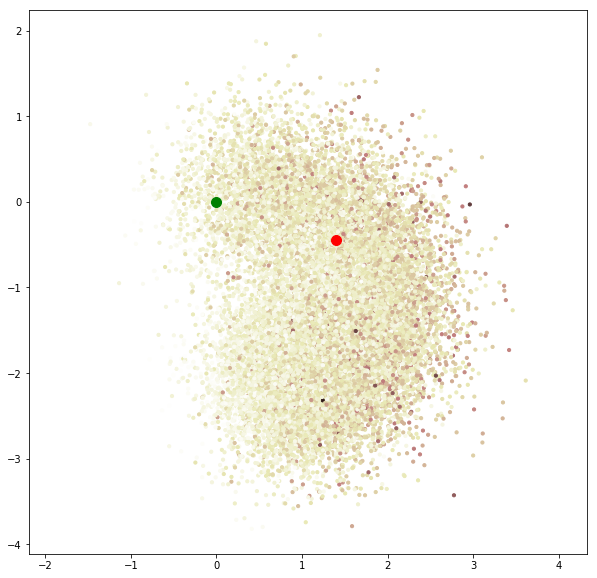

In [5]:
# tpo.plot_costmap(plt, model, data, goal, samples=100, spread=0.4)
min_sample, min_cost = tpo.plot_costmap(plt, model, data, goal, samples=200, spread=0.5)
print(min_cost)
plt.scatter([min_sample[0]], [min_sample[1]], s=100, c='Red', label='min sample');
plt.scatter(goal[0], goal[1], s=100, c='Green', label='goal');

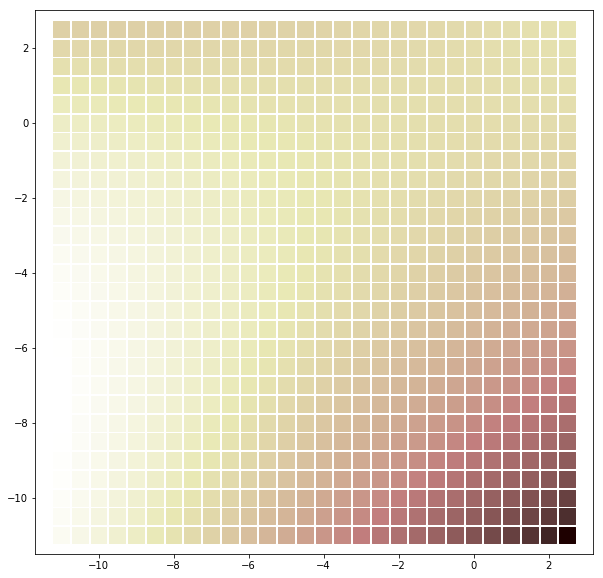

In [6]:
def plot_costmap_2(plt, model, data, g, resolution=0.1, minimum=-5, maximum=5):
    colors = {}
    N = (maximum - minimum) / resolution
    min_sample = None
    min_sample_cost = 1e9
    for x in np.arange(minimum, maximum, resolution):
        for y in np.arange(minimum, maximum, resolution):
            for theta in np.arange(-np.pi, np.pi, np.pi/4):
                s = np.array([[x], [y], [x+np.cos(theta)], [y+np.sin(theta)], [x+2*np.cos(theta)], [y+2*np.sin(theta)]])
                c = model.cost_of_s(s, g)[0,0]
                xy = (x,y)
                colors[xy] = c
                if c < min_sample_cost:
                    min_sample_cost = c
                    min_sample = s
            
    plt.figure(figsize=(10,10))
    xs = [k[0] for k in colors.keys()]
    ys = [k[1] for k in colors.keys()]
    plt.scatter(xs, ys, c=colors.values(), s=resolution * 500, cmap='pink', marker='s')
    plt.axis("equal")
    return min_sample, min_sample_cost

tpo.plot_costmap_2(plt, model, data, goal, resolution=.5, minimum=-11, maximum=3);